In [ ]:
# Import libraries

import os,cv2

import matplotlib.pyplot as plt

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

from keras import backend as K

K.image_data_format() =='th'

# from keras.layers import Merge

from keras.layers import Concatenate

from keras.utils import np_utils

from keras.layers import LSTM

from tensorflow.keras.optimizers import Adam, RMSprop, SGD

import glob
import numpy as np

import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = os.getcwd()

# Define data path

data_path = '/content/drive/MyDrive/ADN eye dataset'

data_dir_list = os.listdir(data_path)

img_rows=128

img_cols=128

num_channel=1

num_epoch=20

no_images=0

for dataset in data_dir_list:

  img_list = os.listdir(data_path + '/' + dataset)

  no_images = no_images+len(img_list)

# Define the number of classes

labels = np.ones((no_images,),dtype='int64')

num_classes = 3

label_index=0

img_data_list=[]

img=0
for dataset in data_dir_list:

  img_list=os.listdir(data_path+'/'+ dataset)

  print ('Loaded the images of dataset-'+'{}\n'.format(dataset))

  for img in img_list:

    input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)

    input_img=cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)

    input_img_resize=cv2.resize(input_img,(128,128))

    img_data_list.append(input_img_resize)

    if dataset[0]== 'A':

      labels[label_index]= 0

#print(dataset[0])

    if dataset[0] == 'D':

      labels[label_index] = 1

    #print(dataset[0])

    if dataset[0] == 'N':

      labels[label_index] = 2

    label_index = label_index+1

    #print(dataset[0])

Loaded the images of dataset-NORMAL3

Loaded the images of dataset-NORMAL8

Loaded the images of dataset-NORMAL4

Loaded the images of dataset-NORMAL9

Loaded the images of dataset-NORMAL7

Loaded the images of dataset-NORMAL2

Loaded the images of dataset-NORMAL5

Loaded the images of dataset-NORMAL6

Loaded the images of dataset-NORMAL15

Loaded the images of dataset-NORMAL14

Loaded the images of dataset-DME9

Loaded the images of dataset-NORMAL1

Loaded the images of dataset-NORMAL11

Loaded the images of dataset-NORMAL12

Loaded the images of dataset-DME6

Loaded the images of dataset-DME8

Loaded the images of dataset-NORMAL13

Loaded the images of dataset-DME7

Loaded the images of dataset-NORMAL10

Loaded the images of dataset-DME5

Loaded the images of dataset-DME14

Loaded the images of dataset-DME1

Loaded the images of dataset-DME11

Loaded the images of dataset-DME10

Loaded the images of dataset-DME3

Loaded the images of dataset-DME15

Loaded the images of dataset-DME2



In [ ]:
img_data = np.array(img_data_list)

img_data = img_data.astype('float32')

img_data /= 255

print (img_data.shape)

# Using 'th' for the image_dim_ordering we get accuracy >=0.99.

# Using 'tf' for the dim order I get accuracy >= 0.9 but on more epochs

if num_channel==1:

  if K.image_data_format()=='channels_first':

    img_data= np.expand_dims(img_data, axis=1)

    print (img_data.shape)

  else:

    img_data= np.expand_dims(img_data, axis=3)

    print (img_data.shape)

else:

  if K.image_data_format()=='channels_first':

    img_data=np.rollaxis(img_data,3,1)
    print (img_data.shape)

labels[0:722] = 0

labels[723:1823] = 1

labels[1824:3231] = 2



(3231, 128, 128)
(3231, 128, 128, 1)


In [ ]:
# Define the number of classes

num_classes = 3

names = ['AMD','DME','NORMAL']

# convert class labels to on-hot encoding

Y = np_utils.to_categorical(labels, num_classes)

#print(Y)

#Shuffle the dataset with random state=2

x,y = shuffle(img_data, Y,random_state=2)

#print(y)

# Split the dataset with 20% testing data

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

#print(y_test)

X_train.shape

y_train.shape

(2584, 3)

In [ ]:
ann_model=Sequential([Flatten(input_shape=(128,128,1)),Dense(128, activation='relu'),Dropout(0.2),Dense(64, activation='relu'),Dropout(0.2),Dense(3,activation='softmax')])
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist=ann_model.fit(X_train,y_train,epochs=20,batch_size=16,verbose=True,validation_split=0.2)

Epoch 1/20
130/130 [==============================] - 7s 36ms/step - loss: 0.9784 - accuracy: 0.5864 - val_loss: 0.7030 - val_accuracy: 0.6770
Epoch 2/20
130/130 [==============================] - 5s 40ms/step - loss: 0.6688 - accuracy: 0.7160 - val_loss: 0.4898 - val_accuracy: 0.8046
Epoch 3/20
130/130 [==============================] - 4s 32ms/step - loss: 0.5624 - accuracy: 0.7557 - val_loss: 0.4501 - val_accuracy: 0.8259
Epoch 4/20
130/130 [==============================] - 4s 33ms/step - loss: 0.5476 - accuracy: 0.7639 - val_loss: 0.4721 - val_accuracy: 0.8588
Epoch 5/20
130/130 [==============================] - 5s 41ms/step - loss: 0.4988 - accuracy: 0.7983 - val_loss: 0.4221 - val_accuracy: 0.8414
Epoch 6/20
130/130 [==============================] - 4s 31ms/step - loss: 0.4467 - accuracy: 0.8229 - val_loss: 0.3764 - val_accuracy: 0.8743
Epoch 7/20
130/130 [==============================] - 4s 32ms/step - loss: 0.3962 - accuracy: 0.8403 - val_loss: 0.3591 - val_accuracy: 0.8685

In [ ]:
# Predict model on Test Data

Y_pred = ann_model.predict(X_test)

print(Y_pred)

# Printing the confusion matrix

from sklearn.metrics import classification_report,confusion_matrix

import itertools

# Print the classes of the Prediction

y_pred = np.argmax(Y_pred, axis=1)

print(y_pred)

target_names = ['AMD', 'DME', 'Normal']

# Plotting the confusion matrix


21/21 [==============================] - 0s 6ms/step
[[3.0781728e-30 2.3707728e-12 9.9999994e-01]
 [1.3506415e-13 3.5546515e-07 9.9999958e-01]
 [9.6126294e-01 5.8742694e-04 3.8149662e-02]
 ...
 [1.2885176e-18 1.9453158e-07 9.9999976e-01]
 [4.1451690e-06 2.8108938e-02 9.7188693e-01]
 [4.7203344e-03 7.2722225e-03 9.8800743e-01]]
[2 2 0 2 2 2 0 1 1 2 1 1 2 2 1 2 0 1 1 1 2 1 1 2 2 2 0 2 2 2 1 1 1 2 2 2 2
 0 2 2 2 2 1 2 1 1 2 2 0 2 2 2 2 1 2 1 2 2 2 2 1 1 2 1 2 2 2 1 1 2 1 0 1 0
 1 1 0 2 1 2 1 1 2 2 1 2 0 2 0 1 2 1 1 1 0 2 1 1 2 2 2 2 1 1 1 1 0 1 1 2 1
 2 2 1 2 0 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 0 1 2 2 1 1 0 1 2 1 2 1 1 1
 1 1 1 2 2 0 2 2 2 0 1 2 1 2 1 1 2 2 2 2 2 1 2 1 2 1 1 2 1 2 1 2 2 2 2 0 1
 1 0 1 2 2 2 0 1 0 1 2 2 1 2 2 2 2 0 1 0 2 1 2 0 2 1 2 1 2 1 0 1 1 1 2 2 2
 2 2 2 2 0 1 0 2 1 1 1 2 1 1 1 0 1 1 2 2 2 1 1 2 0 2 1 2 2 0 2 0 2 2 2 1 1
 2 0 2 2 2 1 1 1 2 0 2 2 1 2 2 2 2 1 2 2 2 1 2 1 2 2 2 1 1 0 1 1 1 1 2 2 2
 2 2 2 0 1 2 2 1 2 2 2 0 1 2 0 1 2 1 1 1 2 0 2 2 1 0 1 1 1 2 2 0 0 2 1 

In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  """

  This function prints and plots the confusion matrix.

  Normalization can be applied by setting `normalize=True`.

  """

  plt.imshow(cm, interpolation='nearest', cmap=cmap)

  plt.title(title)

  plt.colorbar()

  tick_marks = np.arange(len(classes))

  plt.xticks(tick_marks, classes, rotation=45)

  plt.yticks(tick_marks, classes)

  if normalize:

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print("Normalized confusion matrix")

  else:

    print('Confusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):

    plt.text(j, i, cm[i, j],

    horizontalalignment="center",

    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 91  14  23]
 [  1 214  20]
 [  0  11 273]]


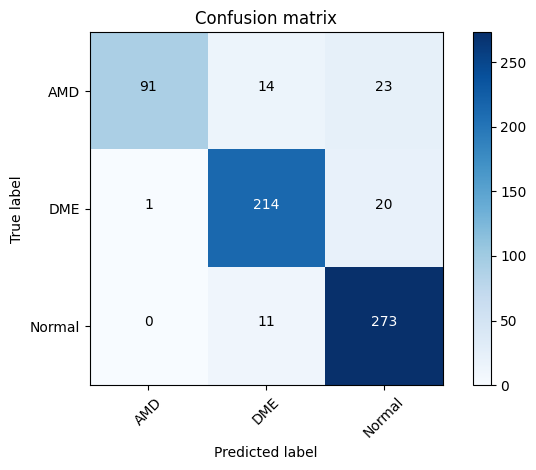

In [ ]:


#Computation confusion matrix

cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1),
y_pred))

np.set_printoptions(precision=3)

plt.figure()
# Plotting non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=target_names,

title='Confusion matrix')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

#reversing one hot encoding

a = np.array(y_test)

import pandas as pd

df= pd.DataFrame({"0":a[:,0],"1":a[:,1],"2":a[:,2]})

#print(df)

#print(a)

df['tags']=''

for col_name in df.columns:

  df.loc[df[col_name]==1,'tags']= df['tags']+' '+col_name

df['tags'] = df['tags'].astype(int)

#print(df['tags'].dtype)

#print(y_pred.dtype)

print(classification_report(df['tags'], y_pred,target_names=target_names))

              precision    recall  f1-score   support

         AMD       0.99      0.71      0.83       128
         DME       0.90      0.91      0.90       235
      Normal       0.86      0.96      0.91       284

    accuracy                           0.89       647
   macro avg       0.92      0.86      0.88       647
weighted avg       0.90      0.89      0.89       647

